In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sklearn.__version__

'0.23.1'

In [68]:
## sklearn.datasets.load_iris(*, return_X_y=False, as_frame=False)  # as_frame is new in 0.23

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [72]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [73]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
X.columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [74]:
X.shape

(150, 4)

In [75]:
y = iris.target

In [76]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [77]:
X.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
48,5.3,3.7,1.5,0.2
144,6.7,3.3,5.7,2.5
72,6.3,2.5,4.9,1.5
10,5.4,3.7,1.5,0.2
130,7.4,2.8,6.1,1.9


In [78]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

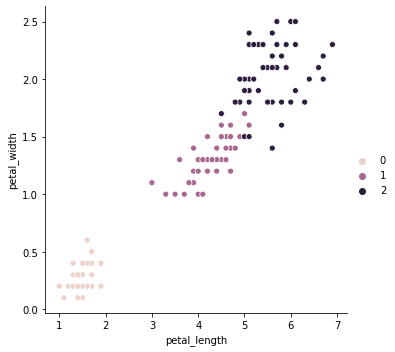

In [79]:
sns.relplot(x='petal_length',y='petal_width', data = X, hue=y)

In [80]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.8, random_state=100)

In [81]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_pred = model.predict(X_test_std)

In [155]:
y_pred

array([2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1,
       2, 0, 2, 2, 0, 1, 1, 1, 2, 1])

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  1,  0],
       [ 0, 34,  2],
       [ 0,  8, 34]], dtype=int64)

Text(33.0, 0.5, 'Actual')

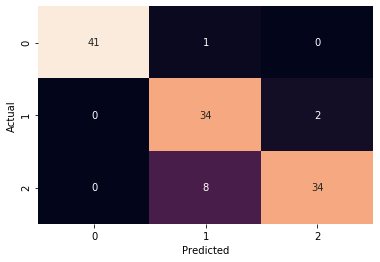

In [157]:
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [88]:
from sklearn.metrics import plot_confusion_matrix

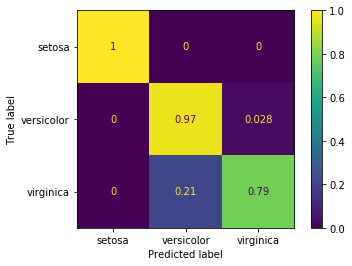

In [89]:
plot_confusion_matrix(model,X_test,y_test, display_labels=iris.target_names, normalize='true')

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.80      0.97      0.88        36
           2       0.97      0.79      0.87        42

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.91       120
weighted avg       0.93      0.92      0.92       120



In [91]:
print(f'Macro Avg Precision : {(1.0 + .80 + .97)  / 3:.2f}')

Macro Avg Precision : 0.92


In [92]:
print(f'Weighted Avg Recall :  {(1.0 * 42 + .80 * 36 + .97 * 42) / 120  :.2f}')

Weighted Avg Recall :  0.93


In [100]:
f"{10.4433:.2f}"

'10.44'

In [147]:
y_prob_pred = model.predict_proba(X_test_std)

In [137]:
np.set_printoptions(formatter={'float': lambda x : f"{x:0.2f}"})  # change format of float 

In [148]:
y_prob_pred[:10]

array([[0.46, 0.54, 0.00],
       [1.00, 0.00, 0.00],
       [0.06, 0.94, 0.00],
       [1.00, 0.00, 0.00],
       [0.61, 0.39, 0.00],
       [0.28, 0.72, 0.00],
       [1.00, 0.00, 0.00],
       [1.00, 0.00, 0.00],
       [0.65, 0.35, 0.00],
       [1.00, 0.00, 0.00]])

In [166]:
cf = model.coef_

In [172]:
cf

array([[-0.70, 0.77, -1.01, -1.03],
       [0.14, -0.65, -0.15, -0.31],
       [0.56, -0.12, 1.16, 1.33]])

In [171]:
intercept = model.intercept_

In [173]:
intercept

array([-0.48, 1.50, -1.02])

In [170]:
row1 = X_test_std[0,:]  # first row in test data 

In [176]:
y_value = intercept[0] + row1[0] * cf[0,0] +  row1[1] * cf[0,1] + row1[2] * cf[0,2] + row1[3] * cf[0,3]

In [177]:
1 / (1 + np.exp(y_value))

0.9785072545834832